# Adult Dataset Analysis

In [1]:
import pandas as pd
import numpy as np

## General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  target          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB
target count
<=50K    34014
>50K     11208
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

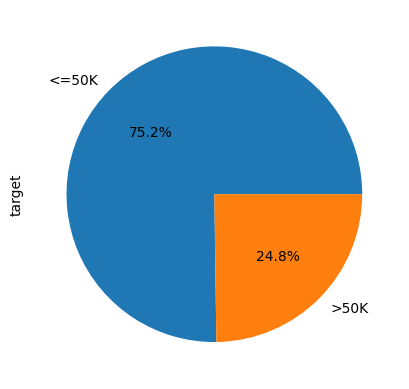

In [2]:
df = pd.read_csv("../Cleaned/Adult/Adult.csv", skipinitialspace=True)
df.info()
print("target count")
print(df['target'].value_counts())
df['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## Sex

Male      30527
Female    14695
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

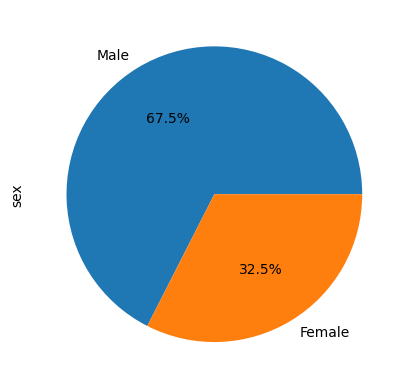

In [6]:
print(df['sex'].value_counts())
df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = Male

<=50K    20988
>50K      9539
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

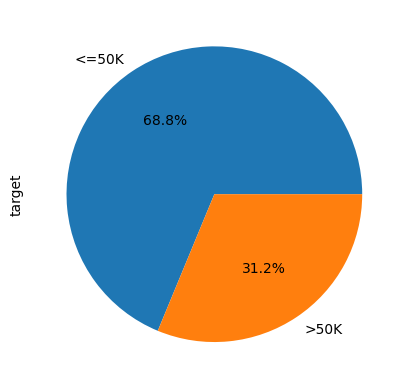

In [8]:
print(df.loc[df['sex']=="Male"]['target'].value_counts())
df.loc[df['sex']=="Male"]['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = Female

<=50K    13026
>50K      1669
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

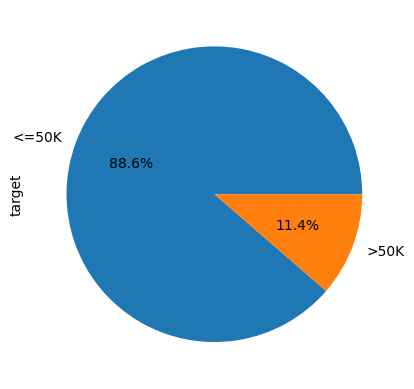

In [9]:
print(df.loc[df['sex']=="Female"]['target'].value_counts())
df.loc[df['sex']=="Female"]['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >50K

let y- = <=50K

let s0 = Male

let s1 = Female

In [68]:
yp = len(df.loc[df['target']==">50K"])
yn = len(df.loc[df['target']=="<=50K"])
#print(yn)
#print(yp)

# p(y+|s0) -> p(>50K|Male)
p1 = len(df.loc[(df['sex']=="Male") & (df['target']==">50K")]) / len(df.loc[df['sex']=="Male"])
#print(p1)
# p(y-|s1) -> p(<=50K|Female)
p2 = len(df.loc[(df['sex']=="Female") & (df['target']=="<=50K")]) / len(df.loc[df['sex']=="Female"])
#print(p2)
# p(y+|s1) -> p(>50K|Female)
p3 = len(df.loc[(df['sex']=="Female") & (df['target']==">50K")]) / len(df.loc[df['sex']=="Female"])
#print(p3)
# p(y-|s0) -> p(<=50K|Male)
p4 = len(df.loc[(df['sex']=="Male") & (df['target']=="<=50K")]) / len(df.loc[df['sex']=="Male"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 3.547


In [69]:
#OR for s0 = Female
oddsratio = (p3 * p4) / (p1 * p2)
print("OR: {:.3f}".format(oddsratio))

OR: 0.282


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >50K

let y- = <=50K

let s0 = Male

let s1 = Female

In [43]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 2.751


### Proxies

Most of the proxies found for sex include (a combination of):
 - relationship
 - marital_status
 - occupation
 - education-num
 - hours-per-week
 - workclass

Best model (min depth) found with a node at depth 1 with 18666 samples.

	** relationship_Husband > 0.5 ,  #impurity: 0.00010714094360420034, #samples: 18666.

Best model (max sample) found with 18737 sample in a node at depth 4.

    ** relationship_Wife <= 0.5 , marital-status_Married-civ-spouse > 0.5 , native-country_China <= 0.5 , relationship_Other-relative <= 0.5 ,  #impurity: 0.006596023314881627, #samples: 18737.
    
    
Other:

    ** relationship_Wife <= 0.5 , marital-status_Married-civ-spouse > 0.5 , native-country_China <= 0.5 , relationship_Other-relative <= 0.5 , native-country_Vietnam <= 0.5 ,  #impurity: 0.006394477534502174, #samples: 18706.

    ** relationship_Wife <= 0.5 , marital-status_Married-civ-spouse > 0.5 , native-country_China <= 0.5 , relationship_Other-relative <= 0.5 , native-country_Vietnam <= 0.5 , education-num <= 12.5 ,  #impurity: 0.008474422815753724, #samples: 13160.

    ** relationship_Wife <= 0.5 , marital-status_Married-civ-spouse > 0.5 , native-country_China <= 0.5 , relationship_Other-relative <= 0.5 , native-country_Vietnam <= 0.5 , education-num <= 12.5 , occupation_Adm-clerical <= 0.5 ,  #impurity: 0.006556781772758313, #samples: 12465.

    ** relationship_Wife <= 0.5 , marital-status_Married-civ-spouse > 0.5 , native-country_China <= 0.5 , relationship_Other-relative <= 0.5 , native-country_Vietnam <= 0.5 , education-num <= 12.5 , occupation_Adm-clerical <= 0.5 , native-country_Japan <= 0.5 ,  #impurity: 0.006404032538594229, #samples: 12452.

    ** relationship_Wife <= 0.5 , marital-status_Married-civ-spouse > 0.5 , native-country_China <= 0.5 , relationship_Other-relative <= 0.5 , native-country_Vietnam <= 0.5 , education-num <= 12.5 , occupation_Adm-clerical <= 0.5 , native-country_Japan <= 0.5 , workclass_Without-pay <= 0.5 ,  #impurity: 0.006248937169082147, #samples: 12443.

    ** relationship_Wife <= 0.5 , marital-status_Married-civ-spouse > 0.5 , native-country_China <= 0.5 , relationship_Other-relative <= 0.5 , native-country_Vietnam <= 0.5 , education-num <= 12.5 , occupation_Adm-clerical <= 0.5 , native-country_Japan <= 0.5 , workclass_Without-pay <= 0.5 , occupation_Other-service <= 0.5 ,  #impurity: 0.005088162285487585, #samples: 11762.
        

For proxy: relationship == Husband

Male      18665
Female        1
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

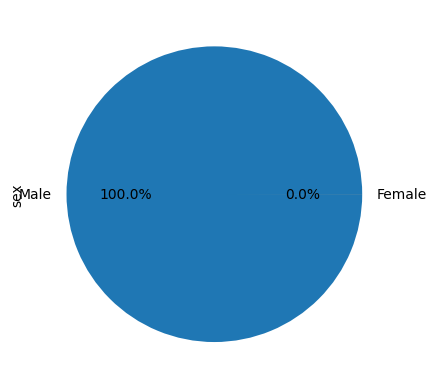

In [10]:
print(df.loc[(df['relationship']=="Husband")]['sex'].value_counts())
df.loc[(df['relationship']=="Husband")]['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<=50K    10159
>50K      8507
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

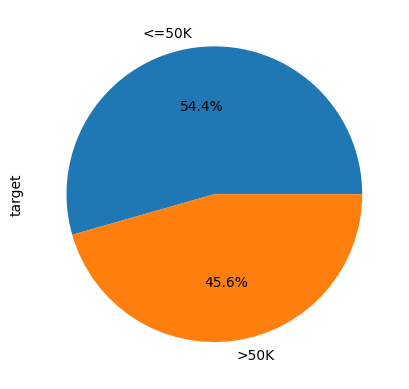

In [11]:
print(df.loc[(df['relationship']=="Husband")]['target'].value_counts())
df.loc[(df['relationship']=="Husband")]['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >50K

let y- = <=50K

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [44]:
# p(y+|s0) -> p(>50K|Proxy)
p1 = len(df.loc[(df['relationship']=="Husband") & (df['target']==">50K")]) / len(df.loc[df['relationship']=="Husband"])
#print(p1)
# p(y-|s1) -> p(<=50K|!Proxy)
p2 = len(df.loc[(df['relationship']!="Husband") & (df['target']=="<=50K")]) / len(df.loc[df['relationship']!="Husband"])
#print(p2)
# p(y+|s1) -> p(>50K|!Proxy)
p3 = len(df.loc[(df['relationship']!="Husband") & (df['target']==">50K")]) / len(df.loc[df['relationship']!="Husband"])
#print(p3)
# p(y-|s0) -> p(<=50K|Proxy)
p4 = len(df.loc[(df['relationship']=="Husband") & (df['target']=="<=50K")]) / len(df.loc[df['relationship']=="Husband"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 7.396


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >50K

let y- = <=50K

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [45]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 4.481


For proxy: relationship != Wife & marital-status == Married-civ-spouse & native-country != China & relationship != Other-relative

Male      18675
Female       62
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

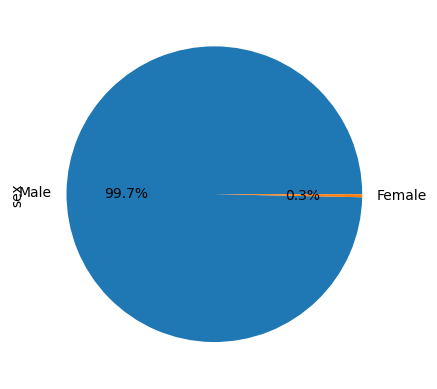

In [12]:
print(df.loc[(df['relationship']!="Wife") & (df['marital-status']=="Married-civ-spouse") & (df['native-country']!="China") & (df['relationship']!="Other-relative")]['sex'].value_counts())
df.loc[(df['relationship']!="Wife") & (df['marital-status']=="Married-civ-spouse") & (df['native-country']!="China") & (df['relationship']!="Other-relative")]['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<=50K    10232
>50K      8505
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

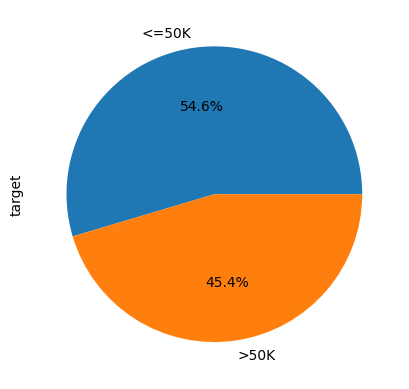

In [13]:
print(df.loc[(df['relationship']!="Wife") & (df['marital-status']=="Married-civ-spouse") & (df['native-country']!="China") & (df['relationship']!="Other-relative")]['target'].value_counts())
df.loc[(df['relationship']!="Wife") & (df['marital-status']=="Married-civ-spouse") & (df['native-country']!="China") & (df['relationship']!="Other-relative")]['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >50K

let y- = <=50K

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [70]:
# df.loc[(df['relationship']!="Wife") & (df['marital-status']=="Married-civ-spouse") & (df['native-country']!="China") & (df['relationship']!="Other-relative")]
# p(y+|s0) -> p(>50K|Proxy)
p1 = len(df.loc[(df['relationship']!="Wife") & (df['relationship']!="Other-relative") & (df['marital-status']=="Married-civ-spouse") & (df['native-country']!="China") & (df['target']==">50K")]) / len(df.loc[(df['relationship']!="Wife") & (df['relationship']!="Other-relative") & (df['marital-status']=="Married-civ-spouse") & (df['native-country']!="China")])
#print(p1)
# p(y-|s1) -> p(<=50K|!Proxy)
p2 = len(df.loc[((df['relationship']=="Wife") | (df['relationship']=="Other-relative") | (df['marital-status']!="Married-civ-spouse") | (df['native-country']=="China")) & (df['target']=="<=50K")]) / len(df.loc[(df['relationship']=="Wife") | (df['relationship']=="Other-relative") | (df['marital-status']!="Married-civ-spouse") | (df['native-country']=="China")])
#print(p2)
# p(y+|s1) -> p(>50K|!Proxy)
p3 = len(df.loc[((df['relationship']=="Wife") | (df['relationship']=="Other-relative") | (df['marital-status']!="Married-civ-spouse") | (df['native-country']=="China")) & (df['target']==">50K")]) / len(df.loc[(df['relationship']=="Wife") | (df['relationship']=="Other-relative") | (df['marital-status']!="Married-civ-spouse") | (df['native-country']=="China")])
#print(p3)
# p(y-|s0) -> p(<=50K|Proxy)
p4 = len(df.loc[(df['relationship']!="Wife") & (df['relationship']!="Other-relative") & (df['marital-status']=="Married-civ-spouse") & (df['native-country']!="China") & (df['target']=="<=50K")]) / len(df.loc[(df['relationship']!="Wife") & (df['relationship']!="Other-relative") & (df['marital-status']=="Married-civ-spouse") & (df['native-country']!="China")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 7.313


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >50K

let y- = <=50K

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [48]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 4.448


## Race

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64


<AxesSubplot:ylabel='race'>

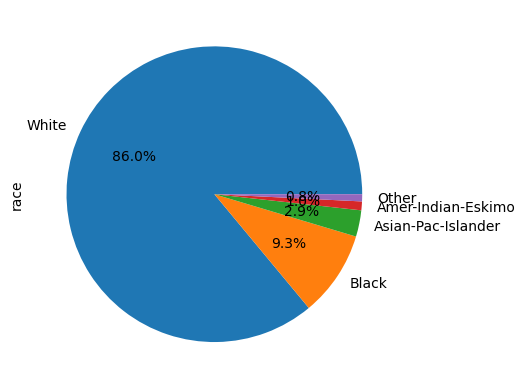

In [14]:
print(df['race'].value_counts())
df['race'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = White

<=50K    28696
>50K     10207
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

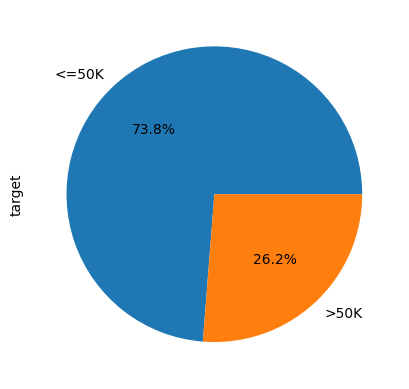

In [15]:
print(df.loc[df['race']=="White"]['target'].value_counts())
df.loc[df['race']=="White"]['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Black

<=50K    3694
>50K      534
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

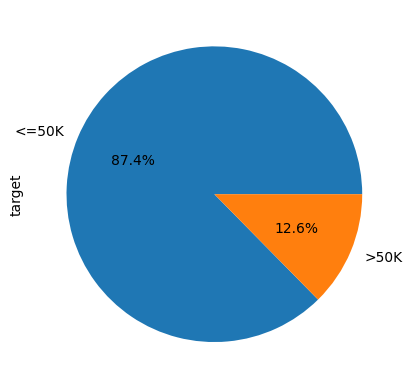

In [18]:
print(df.loc[df['race']=="Black"]['target'].value_counts())
df.loc[df['race']=="Black"]['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Asian-Pac-Islander

<=50K    934
>50K     369
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

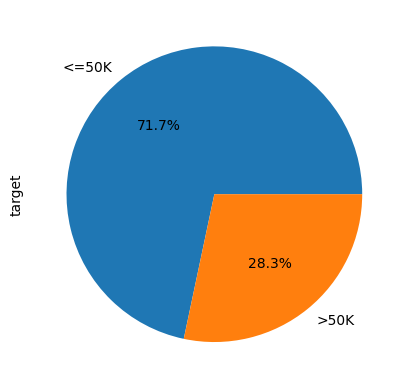

In [19]:
print(df.loc[df['race']=="Asian-Pac-Islander"]['target'].value_counts())
df.loc[df['race']=="Asian-Pac-Islander"]['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Amer-Indian-Eskimo

<=50K    382
>50K      53
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

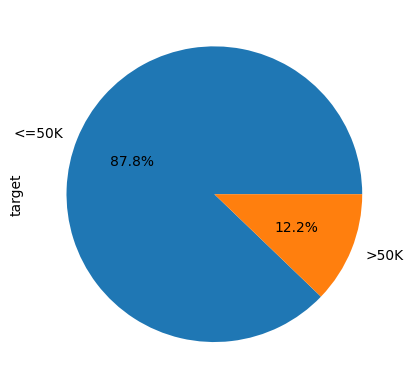

In [20]:
print(df.loc[df['race']=="Amer-Indian-Eskimo"]['target'].value_counts())
df.loc[df['race']=="Amer-Indian-Eskimo"]['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Other

<=50K    308
>50K      45
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

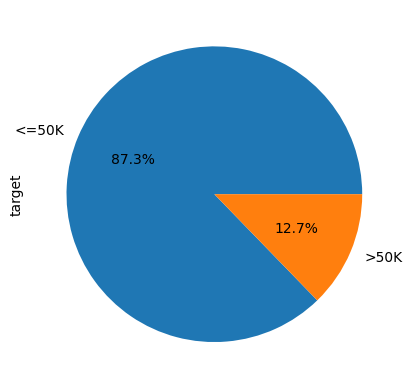

In [21]:
print(df.loc[df['race']=="Other"]['target'].value_counts())
df.loc[df['race']=="Other"]['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >50K

let y- = <=50K

let s0 = White

let s1 = not White

In [52]:
# p(y+|s0) -> p(>50K|White)
p1 = len(df.loc[(df['race']=="White") & (df['target']==">50K")]) / len(df.loc[df['race']=="White"])
#print(p1)
# p(y-|s1) -> p(<=50K|!White)
p2 = len(df.loc[(df['race']!="White") & (df['target']=="<=50K")]) / len(df.loc[df['race']!="White"])
#print(p2)
# p(y+|s1) -> p(>50K|!White)
p3 = len(df.loc[(df['race']!="White") & (df['target']==">50K")]) / len(df.loc[df['race']!="White"])
#print(p3)
# p(y-|s0) -> p(<=50K|White)
p4 = len(df.loc[(df['race']=="White") & (df['target']=="<=50K")]) / len(df.loc[df['race']=="White"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.890


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >50K

let y- = <=50K

let s0 = White

let s1 = not White

In [53]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.656


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >50K

let y- = <=50K

let s0 = Black

let s1 = not Black

In [54]:
# p(y+|s0) -> p(>50K|Black)
p1 = len(df.loc[(df['race']=="Black") & (df['target']==">50K")]) / len(df.loc[df['race']=="Black"])
#print(p1)
# p(y-|s1) -> p(<=50K|!Black)
p2 = len(df.loc[(df['race']!="Black") & (df['target']=="<=50K")]) / len(df.loc[df['race']!="Black"])
#print(p2)
# p(y+|s1) -> p(>50K|!Black)
p3 = len(df.loc[(df['race']!="Black") & (df['target']==">50K")]) / len(df.loc[df['race']!="Black"])
#print(p3)
# p(y-|s0) -> p(<=50K|Black)
p4 = len(df.loc[(df['race']=="Black") & (df['target']=="<=50K")]) / len(df.loc[df['race']=="Black"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.411


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >50K

let y- = <=50K

let s0 = Black

let s1 = not Black

In [55]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.485


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >50K

let y- = <=50K

let s0 = Asian-Pac-Islander

let s1 = not Asian-Pac-Islander

In [56]:
# p(y+|s0) -> p(>50K|Asian-Pac-Islander)
p1 = len(df.loc[(df['race']=="Asian-Pac-Islander") & (df['target']==">50K")]) / len(df.loc[df['race']=="Asian-Pac-Islander"])
#print(p1)
# p(y-|s1) -> p(<=50K|!Asian-Pac-Islander)
p2 = len(df.loc[(df['race']!="Asian-Pac-Islander") & (df['target']=="<=50K")]) / len(df.loc[df['race']!="Asian-Pac-Islander"])
#print(p2)
# p(y+|s1) -> p(>50K|!Asian-Pac-Islander)
p3 = len(df.loc[(df['race']!="Asian-Pac-Islander") & (df['target']==">50K")]) / len(df.loc[df['race']!="Asian-Pac-Islander"])
#print(p3)
# p(y-|s0) -> p(<=50K|Asian-Pac-Islander)
p4 = len(df.loc[(df['race']=="Asian-Pac-Islander") & (df['target']=="<=50K")]) / len(df.loc[df['race']=="Asian-Pac-Islander"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.206


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >50K

let y- = <=50K

let s0 = Asian-Pac-Islander

let s1 = not Asian-Pac-Islander

In [57]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.147


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >50K

let y- = <=50K

let s0 = Amer-Indian-Eskimo

let s1 = not Amer-Indian-Eskimo

In [58]:
# p(y+|s0) -> p(>50K|Amer-Indian-Eskimo)
p1 = len(df.loc[(df['race']=="Amer-Indian-Eskimo") & (df['target']==">50K")]) / len(df.loc[df['race']=="Amer-Indian-Eskimo"])
#print(p1)
# p(y-|s1) -> p(<=50K|!Amer-Indian-Eskimo)
p2 = len(df.loc[(df['race']!="Amer-Indian-Eskimo") & (df['target']=="<=50K")]) / len(df.loc[df['race']!="Amer-Indian-Eskimo"])
#print(p2)
# p(y+|s1) -> p(>50K|!Amer-Indian-Eskimo)
p3 = len(df.loc[(df['race']!="Amer-Indian-Eskimo") & (df['target']==">50K")]) / len(df.loc[df['race']!="Amer-Indian-Eskimo"])
#print(p3)
# p(y-|s0) -> p(<=50K|Amer-Indian-Eskimo)
p4 = len(df.loc[(df['race']=="Amer-Indian-Eskimo") & (df['target']=="<=50K")]) / len(df.loc[df['race']=="Amer-Indian-Eskimo"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.418


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >50K

let y- = <=50K

let s0 = Amer-Indian-Eskimo

let s1 = not Amer-Indian-Eskimo

In [59]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.489


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >50K

let y- = <=50K

let s0 = Other

let s1 = not Other

In [60]:
# p(y+|s0) -> p(>50K|Other)
p1 = len(df.loc[(df['race']=="Other") & (df['target']==">50K")]) / len(df.loc[df['race']=="Other"])
#print(p1)
# p(y-|s1) -> p(<=50K|!Other)
p2 = len(df.loc[(df['race']!="Other") & (df['target']=="<=50K")]) / len(df.loc[df['race']!="Other"])
#print(p2)
# p(y+|s1) -> p(>50K|!Other)
p3 = len(df.loc[(df['race']!="Other") & (df['target']==">50K")]) / len(df.loc[df['race']!="Other"])
#print(p3)
# p(y-|s0) -> p(<=50K|Other)
p4 = len(df.loc[(df['race']=="Other") & (df['target']=="<=50K")]) / len(df.loc[df['race']=="Other"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.441


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >50K

let y- = <=50K

let s0 = Other

let s1 = not Other

In [61]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.512


### Proxies

Most of the proxies found for race include (a combination of):
 - native-country
 - relationship
 - education
 - occupation


Best model (min depth) found with a node at depth 1 with 21 samples.

	** native-country_Laos > 0.5 ,  #impurity: 0.0, #samples: 21.

Best model (max sample) found with 290 sample in a node at depth 7.

    ** marital-status_Married-civ-spouse > 0.5 , native-country_Hong <= 0.5 , native-country_United-States > 0.5 , occupation_Sales > 0.5 , education-num > 10.5 , workclass_Federal-gov <= 0.5 , workclass_Private <= 0.5 ,  #impurity: 0.006872770511296089, #samples: 290.



For proxy: native-country == Laos

Asian-Pac-Islander    21
Name: race, dtype: int64


<AxesSubplot:ylabel='race'>

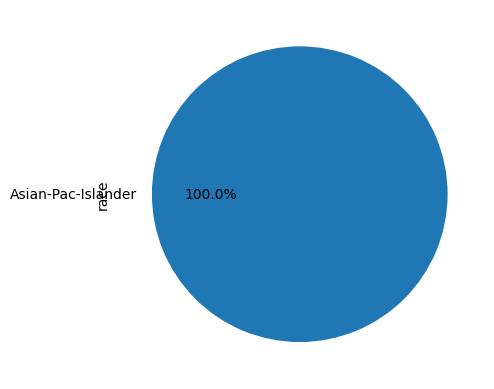

In [22]:
print(df.loc[(df['native-country']=="Laos")]['race'].value_counts())
df.loc[(df['native-country']=="Laos")]['race'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<=50K    19
>50K      2
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

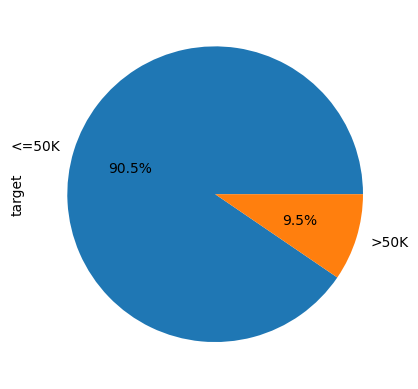

In [23]:
print(df.loc[(df['native-country']=="Laos")]['target'].value_counts())
df.loc[(df['native-country']=="Laos")]['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >50K

let y- = <=50K

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [62]:
# p(y+|s0) -> p(>50K|Proxy)
p1 = len(df.loc[(df['native-country']=="Laos") & (df['target']==">50K")]) / len(df.loc[(df['native-country']=="Laos")])
#print(p1)
# p(y-|s1) -> p(<=50K|!Proxy)
p2 = len(df.loc[(df['native-country']!="Laos") & (df['target']=="<=50K")]) / len(df.loc[(df['native-country']!="Laos")])
#print(p2)
# p(y+|s1) -> p(>50K|!Proxy)
p3 = len(df.loc[(df['native-country']!="Laos") & (df['target']==">50K")]) / len(df.loc[(df['native-country']!="Laos")])
#print(p3)
# p(y-|s0) -> p(<=50K|Proxy)
p4 = len(df.loc[(df['native-country']=="Laos") & (df['target']=="<=50K")]) / len(df.loc[(df['native-country']=="Laos")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.319


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >50K

let y- = <=50K

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [63]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.384


For proxy: marital-status == Married-civ-spouse & native-country != Hong & native-country == United-States & occupation == Sales & education-num > 10.5 & workclass != Federal-gov & workclass != Private

White    289
Black      1
Name: race, dtype: int64


<AxesSubplot:ylabel='race'>

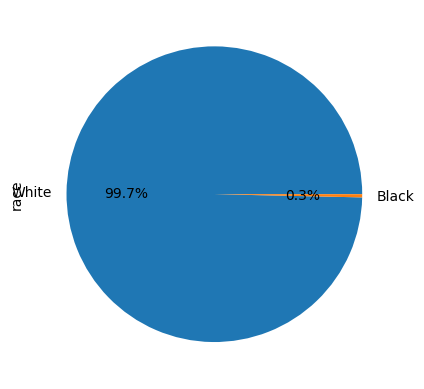

In [4]:
print(df.loc[(df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private")]['race'].value_counts())
df.loc[(df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private")]['race'].value_counts().plot(kind='pie',autopct='%1.1f%%')

>50K     200
<=50K     90
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

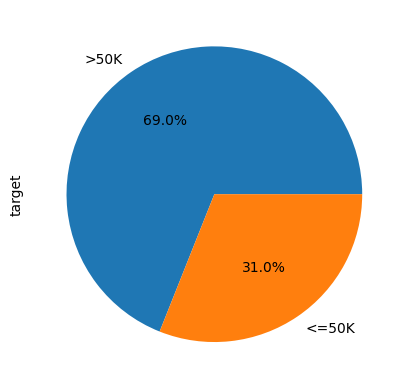

In [5]:
print(df.loc[(df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private")]['target'].value_counts())
df.loc[(df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private")]['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = >50K

let y- = <=50K

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [9]:
# (df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private")
# p(y+|s0) -> p(>50K|Proxy)
p1 = len(df.loc[(df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private") & (df['target']==">50K")]) / len(df.loc[(df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private")])
#print(p1)
# p(y-|s1) -> p(<=50K|!Proxy)
p2 = len(df.loc[((df['marital-status']!="Married-civ-spouse") | (df['native-country']!="United-States") | (df['occupation']!="Sales") | (df['education-num']<=10.5) | (df['workclass']=="Federal-gov") | (df['workclass']=="Private")) & (df['target']=="<=50K")]) / len(df.loc[((df['marital-status']!="Married-civ-spouse") | (df['native-country']!="United-States") | (df['occupation']!="Sales") | (df['education-num']<=10.5) | (df['workclass']=="Federal-gov") | (df['workclass']=="Private"))])
#print(p2)
# p(y+|s1) -> p(>50K|!Proxy)
p3 = len(df.loc[((df['marital-status']!="Married-civ-spouse") | (df['native-country']!="United-States") | (df['occupation']!="Sales") | (df['education-num']<=10.5) | (df['workclass']=="Federal-gov") | (df['workclass']=="Private")) & (df['target']==">50K")]) / len(df.loc[((df['marital-status']!="Married-civ-spouse") | (df['native-country']!="United-States") | (df['occupation']!="Sales") | (df['education-num']<=10.5) | (df['workclass']=="Federal-gov") | (df['workclass']=="Private"))])
#print(p3)
# p(y-|s0) -> p(<=50K|Proxy)
p4 = len(df.loc[(df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private") & (df['target']=="<=50K")]) / len(df.loc[(df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 6.848


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = >50K

let y- = <=50K

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [10]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 2.815


considering that is a proxy for white, then, just consider the universe of white people

In [11]:
# (df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private")
# p(y+|s0) -> p(>50K|Proxy)
p1 = len(df.loc[(df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private") & (df['race']=="White") & (df['target']==">50K")]) / len(df.loc[(df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private") & (df['race']=="White")])
#print(p1)
# p(y-|s1) -> p(<=50K|!Proxy)
p2 = len(df.loc[((df['marital-status']!="Married-civ-spouse") | (df['native-country']!="United-States") | (df['occupation']!="Sales") | (df['education-num']<=10.5) | (df['workclass']=="Federal-gov") | (df['workclass']=="Private")) & (df['race']=="White") & (df['target']=="<=50K")]) / len(df.loc[((df['marital-status']!="Married-civ-spouse") | (df['native-country']!="United-States") | (df['occupation']!="Sales") | (df['education-num']<=10.5) | (df['workclass']=="Federal-gov") | (df['workclass']=="Private")) & (df['race']=="White")])
#print(p2)
# p(y+|s1) -> p(>50K|!Proxy)
p3 = len(df.loc[((df['marital-status']!="Married-civ-spouse") | (df['native-country']!="United-States") | (df['occupation']!="Sales") | (df['education-num']<=10.5) | (df['workclass']=="Federal-gov") | (df['workclass']=="Private")) & (df['race']=="White") & (df['target']==">50K")]) / len(df.loc[((df['marital-status']!="Married-civ-spouse") | (df['native-country']!="United-States") | (df['occupation']!="Sales") | (df['education-num']<=10.5) | (df['workclass']=="Federal-gov") | (df['workclass']=="Private")) & (df['race']=="White")])
#print(p3)
# p(y-|s0) -> p(<=50K|Proxy)
p4 = len(df.loc[(df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private") & (df['race']=="White") & (df['target']=="<=50K")]) / len(df.loc[(df['marital-status']=="Married-civ-spouse") & (df['native-country']=="United-States") & (df['occupation']=="Sales") & (df['education-num']>10.5) & (df['workclass']!="Federal-gov") & (df['workclass']!="Private") & (df['race']=="White")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 6.424


In [12]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 2.670
